In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,neighbors
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/PC/OneDrive/Desktop/Datasets/Employee_Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
x = df[['Age', 'BusinessTravel', 'Gender','JobSatisfaction','MaritalStatus', 'MonthlyIncome','PercentSalaryHike']]
x

,Age,BusinessTravel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,PercentSalaryHike
0,41,Travel_Rarely,Female,4,Single,5993,11
1,49,Travel_Frequently,Male,2,Married,5130,23
2,37,Travel_Rarely,Male,3,Single,2090,15
3,33,Travel_Frequently,Female,3,Married,2909,11
4,27,Travel_Rarely,Male,2,Married,3468,12
...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,Male,4,Married,2571,17
1466,39,Travel_Rarely,Male,1,Married,9991,15
1467,27,Travel_Rarely,Male,2,Married,6142,20
1468,49,Travel_Frequently,Male,2,Married,5390,14


In [8]:
y = df[['Attrition']]
y


,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [9]:
type(y)

pandas.core.frame.DataFrame

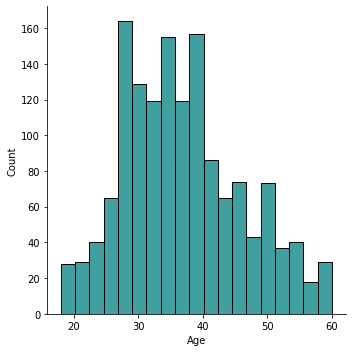

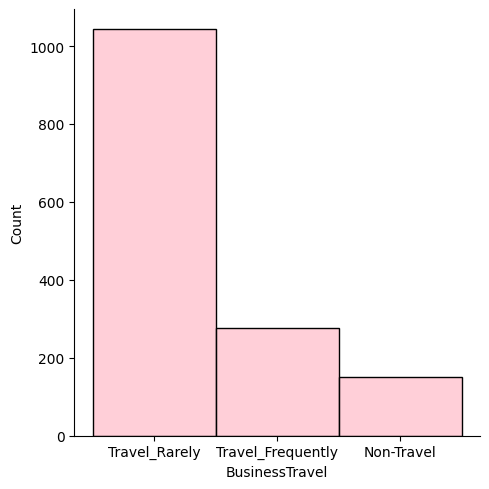

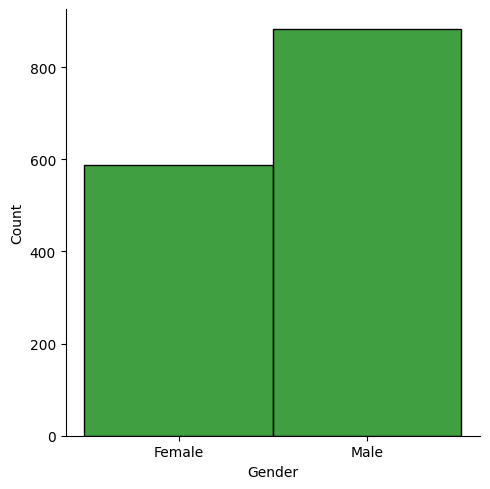

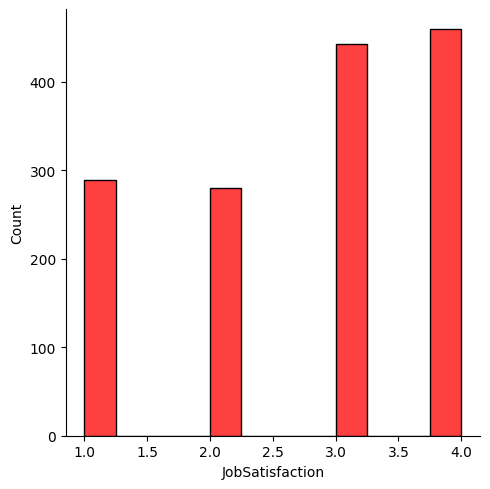

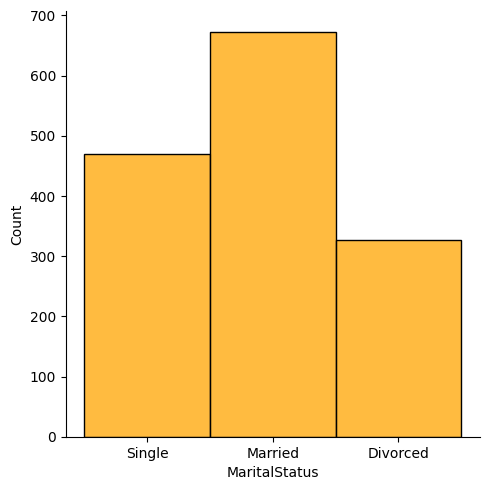

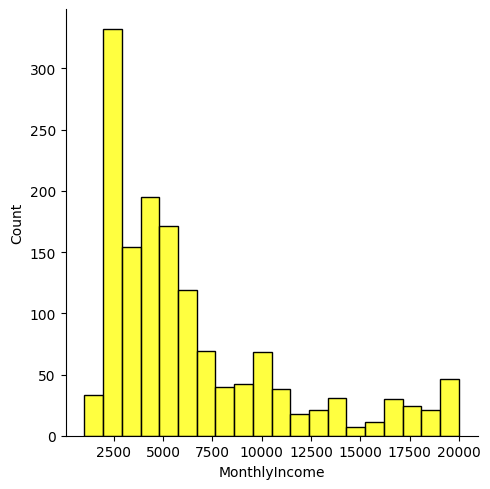

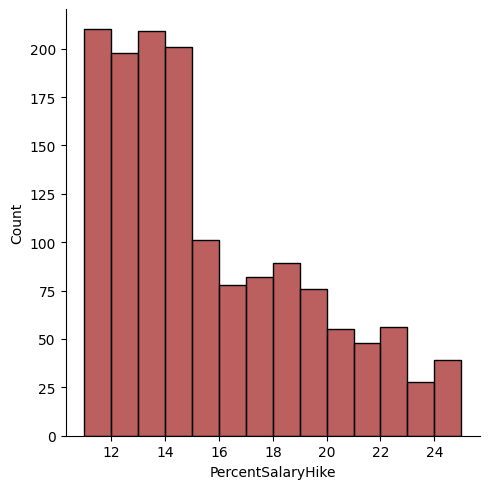

In [10]:
sns.displot(df['Age'],color = 'teal')
sns.displot(df['BusinessTravel'],color = 'pink')
sns.displot(df['Gender'],color = 'green')
sns.displot(df['JobSatisfaction'],color = 'red')
sns.displot(df['MaritalStatus'],color = 'orange')
sns.displot(df['MonthlyIncome'],color = 'yellow')
sns.displot(df['PercentSalaryHike'],color = 'brown')

In [11]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [12]:
df['Gender'].value_counts().keys()

Index(['Male', 'Female'], dtype='object')

In [13]:
df['Gender'].value_counts().values

array([882, 588], dtype=int64)

<BarContainer object of 2 artists>

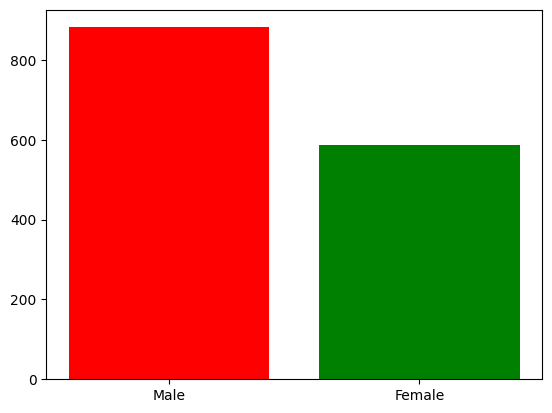

In [14]:
plt.bar(list(df['Gender'].value_counts().keys()),list(df['Gender'].value_counts()),color = ['red','green'])

In [15]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [16]:
df['MaritalStatus'].value_counts().keys()

Index(['Married', 'Single', 'Divorced'], dtype='object')

In [17]:
df['MaritalStatus'].value_counts().values

array([673, 470, 327], dtype=int64)

<BarContainer object of 3 artists>

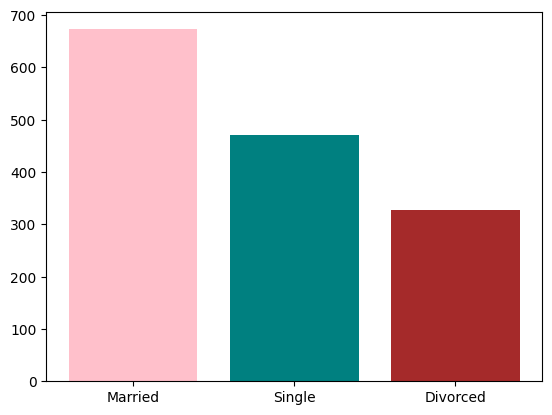

In [18]:
plt.bar(list(df['MaritalStatus'].value_counts().keys()),list(df['MaritalStatus'].value_counts()),color = ['pink','teal', 'brown'])

In [19]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [20]:
df['BusinessTravel'].value_counts().keys()

Index(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype='object')

In [21]:
df['BusinessTravel'].value_counts().values

array([1043,  277,  150], dtype=int64)

<BarContainer object of 3 artists>

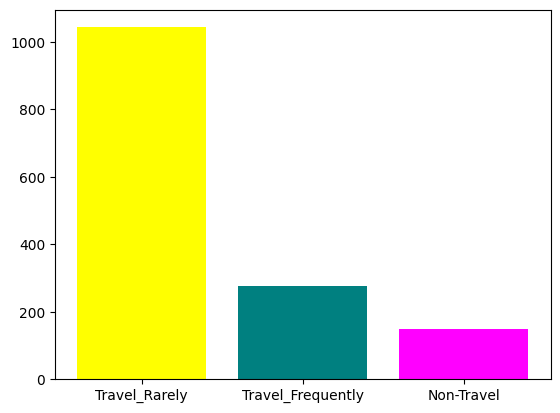

In [22]:
plt.bar(list(df['BusinessTravel'].value_counts().keys()),list(df['BusinessTravel'].value_counts()),color = ['yellow','teal','magenta'])

In [23]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l

LabelEncoder()

In [24]:
x['BusinessTravel'] = l.fit_transform(x['BusinessTravel'])
x['Gender'] = l.fit_transform(x['Gender'])
x['MaritalStatus'] = l.fit_transform(x['MaritalStatus'])
x

,Age,BusinessTravel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,PercentSalaryHike
0,41,2,0,4,2,5993,11
1,49,1,1,2,1,5130,23
2,37,2,1,3,2,2090,15
3,33,1,0,3,1,2909,11
4,27,2,1,2,1,3468,12
...,...,...,...,...,...,...,...
1465,36,1,1,4,1,2571,17
1466,39,2,1,1,1,9991,15
1467,27,2,1,2,1,6142,20
1468,49,1,1,2,1,5390,14


In [25]:
y['Attrition'] = l.fit_transform(y['Attrition'])
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape

(1176, 7)

In [29]:
x_test.shape

(294, 7)

# KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn

KNeighborsClassifier()

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
knn.score(x_test,y_test)

0.8163265306122449

In [33]:
from sklearn.metrics import confusion_matrix
pred = knn.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
cm = confusion_matrix(pred,y_test)
cm

array([[236,  45],
       [  9,   4]], dtype=int64)

Text(42.0, 0.5, 'Actual value')

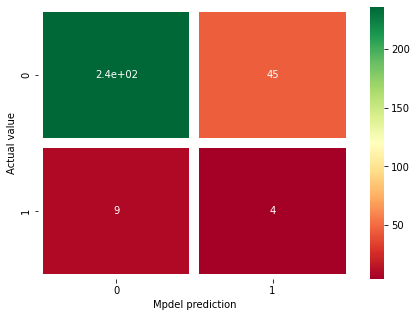

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm,annot = True,cmap = 'RdYlGn',linecolor = 'white', linewidth = 10)
plt.xlabel('Mpdel prediction')
plt.ylabel('Actual value')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       281
           1       0.08      0.31      0.13        13

    accuracy                           0.82       294
   macro avg       0.52      0.57      0.51       294
weighted avg       0.92      0.82      0.86       294



# Support Vectors

In [37]:
from sklearn.svm import SVC

In [38]:
model = SVC(kernel = 'linear')
model

SVC(kernel='linear')

In [39]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
model.score(x_test,y_test)

0.8299319727891157

In [42]:
cf = confusion_matrix(pred,y_test)
cf

array([[235,  40],
       [ 10,   9]], dtype=int64)

Text(51.0, 0.5, 'Actual value')

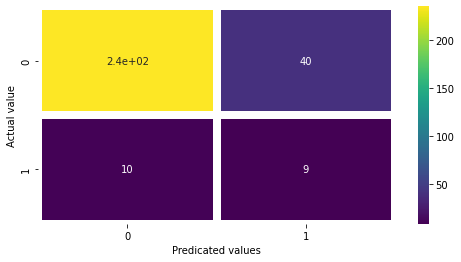

In [43]:
plt.figure(figsize = (8,4))
sns.heatmap(cf,annot = True, cmap = 'viridis',linewidths= 8,linecolor = 'white')
plt.xlabel('Predicated values')
plt.ylabel('Actual value')

In [44]:
sv_rbf = SVC(kernel = 'rbf')
sv_rbf

SVC()

In [45]:
sv_rbf.fit(x_train,y_train)

SVC()

In [46]:
predi = sv_rbf.predict(x_test)
predi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
sv_rbf.score(x_test,y_test)

0.8333333333333334

In [48]:
cx = confusion_matrix(predi,y_test)
cx

array([[245,  49],
       [  0,   0]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

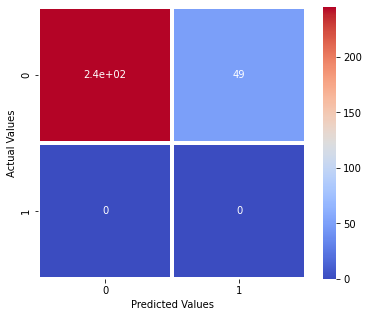

In [49]:
plt.figure(figsize = (6,5))
sns.heatmap(cx,annot = True,cmap = 'coolwarm',linewidth = 4)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [50]:
print(classification_report(predi,y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       294
           1       0.00      0.00      0.00         0

    accuracy                           0.83       294
   macro avg       0.50      0.42      0.45       294
weighted avg       1.00      0.83      0.91       294



In [51]:
sv_poly = SVC(kernel = 'poly')
sv_poly

SVC(kernel='poly')

In [52]:
sv_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [53]:
pre = sv_poly.predict(x_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
sv_poly.score(x_test,y_test)


0.8333333333333334

In [55]:
cfm = confusion_matrix(pre,y_test)
cfm

array([[245,  49],
       [  0,   0]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

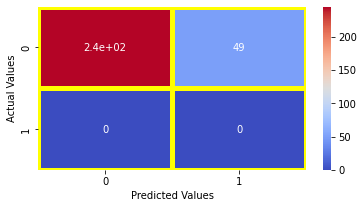

In [56]:
plt.figure(figsize = (6,3))
sns.heatmap(cfm,annot = True,cmap = 'coolwarm',linewidth = 5, linecolor = 'yellow')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [57]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       294
           1       0.00      0.00      0.00         0

    accuracy                           0.83       294
   macro avg       0.50      0.42      0.45       294
weighted avg       1.00      0.83      0.91       294



# Decision Tree

In [58]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion = 'entropy')
dt

DecisionTreeClassifier(criterion='entropy')

In [59]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [60]:
pred = dt.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1])

In [61]:
dt.score(x_test,y_test)

0.7142857142857143

In [62]:
cm = confusion_matrix(pred,y_test)
cm

array([[201,  40],
       [ 44,   9]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

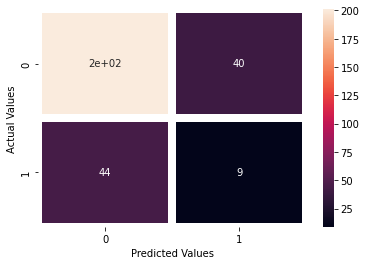

In [63]:
plt.figure(figsize = (6,4))
sns.heatmap(cm,annot = True, linewidth = 8,linecolor = 'white')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [64]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       241
           1       0.18      0.17      0.18        53

    accuracy                           0.71       294
   macro avg       0.50      0.50      0.50       294
weighted avg       0.71      0.71      0.71       294



# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion = 'entropy')
rf

RandomForestClassifier(criterion='entropy')

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [67]:
pre = rf.predict(x_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
rf.score(x_test,y_test)

0.8367346938775511

In [69]:
r = RandomForestClassifier(n_estimators=100,criterion = 'gini')
r

RandomForestClassifier()

In [70]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
pred = r.predict(x_test).reshape(-1,1)
pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [72]:
r.score(x_test,y_test)

0.8469387755102041

In [73]:
cm = confusion_matrix(pred,y_test)
cm

array([[240,  40],
       [  5,   9]], dtype=int64)

Text(24.0, 0.5, 'Actual Values')

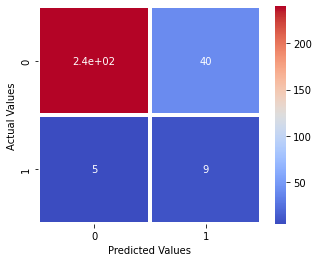

In [74]:
plt.figure(figsize = (5,4))
sns.heatmap(cm,annot = True,cmap = 'coolwarm',linewidth = 4, linecolor = 'white')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [75]:
df = pd.read_csv("C:/Users/PC/OneDrive/Desktop/Datasets/Employee_Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [76]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [77]:
a = df[['Age', 'BusinessTravel', 'PercentSalaryHike', 'MaritalStatus', 'JobSatisfaction', 'DistanceFromHome', 'MonthlyIncome', 'Gender']]
a

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,MonthlyIncome,Gender
0,41,Travel_Rarely,11,Single,4,1,5993,Female
1,49,Travel_Frequently,23,Married,2,8,5130,Male
2,37,Travel_Rarely,15,Single,3,2,2090,Male
3,33,Travel_Frequently,11,Married,3,3,2909,Female
4,27,Travel_Rarely,12,Married,2,2,3468,Male
...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,17,Married,4,23,2571,Male
1466,39,Travel_Rarely,15,Married,1,6,9991,Male
1467,27,Travel_Rarely,20,Married,2,4,6142,Male
1468,49,Travel_Frequently,14,Married,2,2,5390,Male


In [78]:
b = df[['Attrition']]
b

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [79]:
a['BusinessTravel'] = l.fit_transform(a['BusinessTravel'])
a['MaritalStatus'] = l.fit_transform(a['MaritalStatus'])
a['Gender'] = l.fit_transform(a['Gender'])
a.head()

,Age,BusinessTravel,PercentSalaryHike,MaritalStatus,JobSatisfaction,DistanceFromHome,MonthlyIncome,Gender
0,41,2,11,2,4,1,5993,0
1,49,1,23,1,2,8,5130,1
2,37,2,15,2,3,2,2090,1
3,33,1,11,1,3,3,2909,0
4,27,2,12,1,2,2,3468,1


In [80]:
b['Attrition'] = l.fit_transform(b['Attrition'])
b.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size = 0.2,random_state = 42)

In [83]:
b_train.shape

(1176, 1)

# Naive_Bayes

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
mnb = MultinomialNB()
mnb

MultinomialNB()

In [86]:
mnb.fit(a_train,b_train)

MultinomialNB()

In [88]:
pred = mnb.predict(a_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1])

In [89]:
mnb.score(a_test,b_test)

0.6156462585034014

In [90]:
cm = confusion_matrix(pred,b_test)
cm

array([[159,  17],
       [ 96,  22]], dtype=int64)

Text(24.0, 0.5, 'Actual Values')

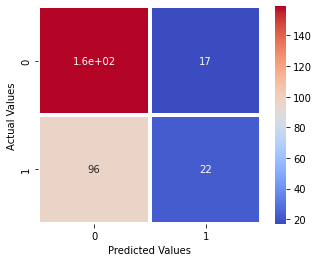

In [91]:
plt.figure(figsize = (5,4))
sns.heatmap(cm,annot = True,cmap = 'coolwarm',linewidth = 4, linecolor = 'white')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')